In [1]:
import os
import pandas as pd

## Just checking the amount of PD and control subjects

In [ ]:
data_path = "/home/Data/Datasets/Parkinson/radiological/PPMI/spect-mri/original"
clases = os.listdir(data_path)

for clase in clases:
    clase_path = os.path.join(data_path, clase, "PPMI")
    subjects = os.listdir(clase_path)
    print("clase: ", clase)
    print("subjects: ", len(subjects))

# Reading the corresponding patients information

**Regarding particular patients of interest**

In [ ]:
gen_path = "../../../../../../Datasets/Parkinson/radiological/PPMI/spect-mri/filtered"
splits = ["test", "train"]
groups = ["control", "parkinson"]
train_control_cases, train_parkinson_cases, test_control_cases, test_parkinson_cases = [], [], [], []

for split in splits:
    for group in groups:
        cases = gen_path + "/" + split + "/" + group + "/" + "parcellation/preprocessed/full_rois/mri_png"

        if group == "control" and split == "train":
            train_control_cases = os.listdir(cases)
        elif group == "control" and split == "test":
            test_control_cases = os.listdir(cases)
        elif group == "parkinson" and split == "train":
            train_parkinson_cases = os.listdir(cases)
        else:
            test_parkinson_cases = os.listdir(cases)
            
train_control_cases = list(map(int, train_control_cases))
test_control_cases = list(map(int, test_control_cases))
train_parkinson_cases = list(map(int, train_parkinson_cases))
test_parkinson_cases = list(map(int, test_parkinson_cases))

In [ ]:
print("====== control ======")
print(train_control_cases)
print("/n")
print(test_control_cases)
print("====== parkinson ======")
print(train_parkinson_cases)
print("/n")
print(test_parkinson_cases)

## General information

In [ ]:
general_path = "../../../../../../Datasets/Parkinson/radiological/PPMI/spect-mri/"
file_path = general_path  + "MDS-UPDRS_Part_III_14Feb2024.csv"
updrs3_df = pd.read_csv(file_path)
updrs3_df.head()

In [ ]:
print(updrs3_df.columns)

## UPDRS information

In [ ]:
general_path = "../../../../../../Datasets/Parkinson/radiological/PPMI/spect-mri/"

print("UPDRS questionnarie PART I")
file_path1 = general_path  + "MDS-UPDRS_Part_I_Patient_Questionnaire_29Jan2024.csv"
updrs1_df = pd.read_csv(file_path1)
print(updrs1_df.columns)

print("UPDRS questionnarie PART II")
file_path2 = general_path  + "MDS_UPDRS_Part_II__Patient_Questionnaire_29Jan2024.csv"
updrs2_df = pd.read_csv(file_path2)
print(updrs2_df.columns)

print("UPDRS questionnarie PART IV")
file_path4 = general_path  + "MDS-UPDRS_Part_IV__Motor_Complications_29Jan2024.csv"
updrs4_df = pd.read_csv(file_path4)
print(updrs4_df.columns)

## Patients information

In [ ]:
ctrl_test_df = updrs3_df[updrs3_df["PATNO"].isin(test_control_cases)]
ctrl_train_df = updrs3_df[updrs3_df["PATNO"].isin(train_control_cases)]
pd_test_df = updrs3_df[updrs3_df["PATNO"].isin(test_parkinson_cases)]
pd_train_df = updrs3_df[updrs3_df["PATNO"].isin(train_parkinson_cases)]

### UPDRS and H&Y scales

In [ ]:
filtered_ctrl_test_df = ctrl_test_df.groupby("PATNO").count()
filtered_ctrl_test_df.head()

In [ ]:
filtered_ctrl_test_df["NHY"]

**Angel estadio**

In [ ]:
df = pd.read_csv(general_path + "estadio.csv")
df.groupby("PATNO").count()

### Demografic info

In [ ]:
print("========== Train population ==========")
print("==== control: ====")
train_ctrl_age_mean = ctrl_train_df["ENROLL_AGE"].mean()
train_ctrl_age_std = ctrl_train_df["ENROLL_AGE"].std()
print("==== parkinson: ====")
train_pd_age_mean = pd_train_df["ENROLL_AGE"].mean()
train_pd_age_std = pd_train_df["ENROLL_AGE"].std()

print("control age: ", train_ctrl_age_mean, train_ctrl_age_std)
print("parkinson age: ", train_pd_age_mean, train_pd_age_std)

print("========== Test population ==========")
print("==== control: ====")
test_ctrl_age_mean = ctrl_test_df["ENROLL_AGE"].mean()
test_ctrl_age_std = ctrl_test_df["ENROLL_AGE"].std()
print("==== parkinson: ====")
test_pd_age_mean = pd_test_df["ENROLL_AGE"].mean()
test_pd_age_std = pd_test_df["ENROLL_AGE"].std()

print("control age: ", test_ctrl_age_mean, test_ctrl_age_std)
print("parkinson age: ", test_pd_age_mean, test_pd_age_std)

**This notebook is for many brain parcellations translation purposes** 

# CycleGan data moving

We have 58 subjects for the control and the parkinson groups, respectively. We want to train:
* **========== experiment 1: ==========** 
* Control to parkinson translation
* Domain A: control
* Domain B: parkinson
For the training of this net, we need (by experience) around 1800 frames by each domain. In this sense, each subject has 182 slices, so we will work in this dataframe interval:

* low_rate = 91-15
* up_rate = 91+15

The above results in 1798 slices over each domain where each suject is represented by the 31 central slices

* **========== experiment 2: ==========** 
* MRI to SPECT domain translation
In this case we want to get 900 mri images for control and the same amount for parkinson subjects. So, as we have 58 subjects in each group, we must to have the following:

900/58 = 16 images for mri control and parkinson, respectively. So, at the end we will have 

* Domain A and B (MRI, Spect, respectively): 928 mri and spect images for control and the same amount for parkinson in each domain.

In [ ]:
# reading the original embc cases
root_path = "/home/Data/Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/"
original_embc_cases = root_path + "train/parkinson/parcellation/preprocessed/full_rois/spect_png/"
embc_cases = sorted(os.listdir(original_embc_cases))
print("amount of original cases: ", len(embc_cases))

#getting all the pd cases 
extension_embc_cases = root_path + "train/parkinson/extension/spect_png/"
augmented_cases = sorted(os.listdir(extension_embc_cases))
print("amount of augmented_cases: ", len(augmented_cases))

extra_cases = list(set(augmented_cases) - set(embc_cases))
print("amount of extra cases: ", len(extra_cases))

In [ ]:
split = "train"
group = "parkinson"
modality = "spect_png"
experiment = "full_rois"
technique = "preprocessed"

source_path = "../../../../../../Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/"
current_root_path = os.path.join(source_path, split, group, "parcellation", technique, experiment, "preprocessed2", modality)
cases = sorted(os.listdir(current_root_path))
print("Number of cases: ", len(cases))


if experiment == "full_rois":
    save_path = "../data/" + technique + "/" + experiment + "/mri_to_spect/preprocessed2/" + split + "_" + modality.split("_")[0]  
else:
    save_path = "../data/" + technique + "/" + experiment + "/mri_to_spect/" + split + "_" + modality.split("_")[0] 
    
print("Saving to: ", save_path)

In [ ]:
for case in embc_cases:
    print("Case: ", case)
    case_path = os.path.join(current_root_path, case)
    files = sorted(os.listdir(case_path))
    can_files = len(files)
    print("Number of files: ", can_files)
    
    if modality == "mri_png":
        half_frame = 145
        low_rate = half_frame - 8
        up_rate = half_frame + 8
    else:
        half_frame = 45
        low_rate = half_frame - 10
        up_rate = half_frame + 5
        
    
    for file in files[low_rate-1:up_rate]:
        file_path = os.path.join(case_path, file)
        if not os.path.exists(save_path):
            os.makedirs(save_path)            
        os.system("cp " + file_path + " " + save_path) 
        
print("Done!")

In [ ]:
half_frame

# Classifier data setting
In this part we will create the csv file for the T1 and spect modalities
* **For T1 images:**

In [ ]:
import os
import pandas as pd

In [ ]:
#root_path = "../../../../../../Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/"
root_path = "/home/Data/franklin/Doctorado/parkinson/projects/T1-SPECT-PD-translation/imgs_results/"
path = "full_rois/preprocessed/mri_to_spect/prodromal_mri_filtered_slices/"
clases = os.listdir(os.path.join(root_path, path))
print(len(clases))

In [ ]:
file_csv2 = open(root_path + "/raw_control_pd_MRI_fullRois_TRAIN.csv", '+w')
for clase in clases:
    cases_path = os.path.join(root_path, split, clase, "parcellation/raw", experiment, modality)
    cases = sorted(os.listdir(cases_path))
    for case in cases:
        case_path = os.path.join(cases_path, case)
        images = sorted(os.listdir(case_path))
        for image in images:
            image_path = os.path.join(case_path, image)
            col_name = ',' + clase + "\n"
            #print(image_path + col_name)
            file_csv2.write(image_path + col_name)
file_csv2.close()

In [ ]:
df = pd.read_csv(root_path + "/raw_control_pd_SPECT_fullRois_TEST.csv", header=None)
df.columns = ["path", "label"]
df.groupby("label").count()

**For synthetic images**

In [ ]:
root_path = "../imgs_results/full_rois/preprocessed/mri_to_spect/mri_filtered_slices/"
#modality = "test_mri"

#cases = os.listdir(root_path + modality)
cases = os.listdir(root_path)

#file_csv2 = open(root_path + modality + "_fullRois.csv", '+w')
file_csv2 = open(root_path + "mri_to_spect_filtered.csv", '+w')
for case in cases:
    #case_path = os.path.join(root_path, modality, case)
    case_path = os.path.join(root_path, case)
    imgs = sorted(os.listdir(case_path))
    for img in imgs:
        image_path = os.path.join(case_path, img)
        clase = img.split("_")[0]
        col_name = ',' + clase + "\n"
        #print(image_path+col_name)
        file_csv2.write(image_path + col_name)
file_csv2.close()

**Full train and test synthetic versions**

In [ ]:
import os
import pandas as pd

root_path = "../imgs_results/full_rois/preprocessed/mri_to_spect/"
split = "train"
folder_path = os.path.join(root_path, "full_"+split+"_mri_png")

imgs = os.listdir(folder_path)

file_csv2 = open(root_path + "full_"+split + "_mriSpectFullRois.csv", '+w')
#print(root_path + "full_"+split + "_fullRois.csv")
for img in imgs:
    image_path = os.path.join(folder_path, img)
    clase = img.split("_")[0]
    col_name = ',' + clase + "\n"
    #print(image_path+col_name)
    file_csv2.write(image_path + col_name)
file_csv2.close()

In [ ]:
df = pd.read_csv(root_path + "full_"+split+ "_mriSpectFullRois.csv", header=None)
df.columns = ["path", "label"]
df.groupby("label").count()

## For prodromal subjects

In [ ]:
import os
import pandas as pd

root_path = "/home/Data/franklin/Doctorado/parkinson/projects/T1-SPECT-PD-translation/imgs_results/full_rois/preprocessed/mri_to_spect/"
split = "prodromal_mri_filtered_slices"
current_path = os.path.join(root_path, split)
cases = sorted(os.listdir(current_path))
print(len(cases))

In [ ]:
file_csv = open(root_path + "/prodromal_synthetic_spect_fullRois_TRAIN.csv", '+w')

for case in cases:
    #print("Case: ", case)
    case_path = os.path.join(current_path, case)
    #print("case_path: ", case_path)
    images = sorted(os.listdir(case_path))
    #print(len(images))
    for image in images:
        image_path = os.path.join(case_path, image)
        col_name = ','+ "prodromal\n"
        #print(image_path + col_name)
        file_csv.write(image_path + col_name)
file_csv.close()

In [ ]:
df = pd.read_csv(root_path + "embc_extension/extension_prodromal_MRI_fullRois_TRAIN.csv", header=None)
df.columns = ["path", "label"]
df.groupby("label").count()

## For SWEDD subjects

In [ ]:
root_path = "../../../../../../Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/"
split = "swedd"
experiment = "extension"
modality = "spect_png"#<----- change this to mri_png when needed
cases = sorted(os.listdir(os.path.join(root_path, split, experiment, modality)))
print(len(cases))

In [ ]:
file_csv = open(root_path + "/swedd_SPECT_preprocessed2_TEST.csv", '+w')

for case in cases:
    case_path = os.path.join(root_path, split, experiment, modality, case)
    images = sorted(os.listdir(case_path))
    for image in images:
        image_path = os.path.join(case_path, image)
        col_name = ','+ "swedd\n"
        #print(image_path + col_name)
        file_csv.write(image_path + col_name)
file_csv.close()

In [ ]:
df = pd.read_csv(root_path + "/swedd_SPECT_preprocessed2_TEST.csv", header=None)
df.columns = ["path", "label"]
df.groupby("label").count()

### **For cycleGan**
#### Test_control mri

In [ ]:
path = "../data/preprocessed/full_rois/mri_to_spect/"
set = "test"
group = "mri"#"control"

images = os.listdir(path + set + "_" + group)

file_csv2 = open(path + set + "_" + group + ".csv", '+w')
for image in images:
    image_path = os.path.join(path, set + "_" + group, image)
    clase = image.split("_")[0]
    col_name = ',' + clase + "\n"
    #print(image_path+col_name)
    file_csv2.write(image_path + col_name)
file_csv2.close()

#### MRI filtered slices

In [ ]:
path = "../imgs_results/full_rois/mri_to_spect/mri_filtered_slices/"
groups = os.listdir(path)

file_csv2 = open(path + "mri_filtered_slices.csv", '+w')
for group in groups:
    
    images = os.listdir(path + group)
    
    for image in images:
        image_path = os.path.join(path, group, image)
        clase = image.split("_")[0]
        col_name = ',' + clase + "\n"
        file_csv2.write(image_path + col_name)
file_csv2.close()

In [ ]:
import pandas as pd

df = pd.read_csv(path + "mri_filtered_slices.csv", header=None)
df.columns = ["path", "label"]
df.groupby("label").count()

## Moving preprocessed files 
The aim of this section is move all the preprocessing steps into a folder 

In [ ]:
root_path = "../../../../../../Datasets/Parkinson/radiological/PPMI/spect-mri/filtered"
split = "test"
group = "control"
modality = "mri"
current_root_path = os.path.join(root_path, split, group, modality)
cases = sorted(os.listdir(current_root_path))

In [ ]:
for case in cases[:2]:
    preprocessed_path = os.path.join(current_root_path, case, "preprocessed")
    files = sorted(os.listdir(preprocessed_path))
    nii_files = [file for file in files if file.endswith(".nii")]
    print("nii files: ", nii_files)
    print("amount of nii: ", len(nii_files))

**Until here**

# Making the csv file for preprocessed SPECT files in version 2

In [ ]:
root_path = "/home/Data/Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/"
split = "train"
groups = ["control", "parkinson"]
file_csv2 = open(root_path + "pdControlSpectPreprocessed2TRAIN.csv", '+w')

for group in groups:
    cases_path = os.path.join(root_path, split, group, "parcellation/preprocessed/full_rois/preprocessed2/spect_png/")
    cases = os.listdir(cases_path)
    for case in cases:
        case_path = os.path.join(cases_path, case)
        images = os.listdir(case_path)
        for image in images:
            image_path = os.path.join(case_path, image)
            col_name = ',' + group + "\n"
            #print(image_path + col_name)
            file_csv2.write(image_path + col_name)

file_csv2.close()

# Know the PD distribution regarding the H&Y scale

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [3]:
baseline_csv_file = "/home/Data/Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/embcBaseline.csv"
extended_csv = "/home/Data/Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/embcExtension.csv"

bases_line_df = pd.read_csv(baseline_csv_file)
extended_df = pd.read_csv(extended_csv)
print("len of base: ", len(bases_line_df))
print("len extended: ", len(extended_df))

len of base:  72
len extended:  186


In [4]:
bases_line_df

,Pat_id,Part 1,Part 1P,Part 2,Part 3,Part 4,H & Y Stage
0,3102,8.0,8.0,17.0,46.0,0.0,2.0
1,3105,6.0,18.0,35.0,69.0,0.0,4.0
2,3107,3.0,7.0,12.0,23.0,5.0,2.0
3,3111,5.0,10.0,20.0,55.0,2.0,2.0
4,3113,8.0,9.0,29.0,57.0,13.0,3.0
...,...,...,...,...,...,...,...
67,4030,NaN,NaN,NaN,NaN,NaN,3.0
68,4034,NaN,NaN,NaN,NaN,NaN,2.0
69,4069,NaN,NaN,NaN,NaN,NaN,1.0
70,50028,NaN,NaN,NaN,NaN,NaN,2.0


(array([ 4.,  0., 47.,  0.,  0., 18.,  0.,  2.,  0.,  1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

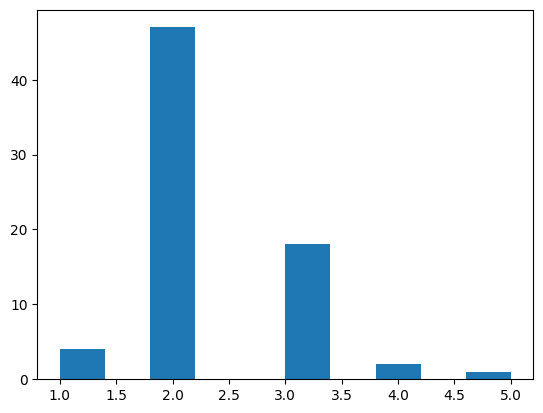

In [6]:
plt.hist(bases_line_df["H & Y Stage"].values)

In [13]:
stage_1 = bases_line_df[bases_line_df["H & Y Stage"]==1.0]
stage_2 = bases_line_df[bases_line_df["H & Y Stage"]==2.0]
stage_3 = bases_line_df[bases_line_df["H & Y Stage"]==3.0]
stage_4 = bases_line_df[bases_line_df["H & Y Stage"]==4.0]
stage_5 = bases_line_df[bases_line_df["H & Y Stage"]==5.0]

print("on stage 1: ", len(stage_1))
print("on stage 2: ", len(stage_2))
print("on stage 3: ", len(stage_3))
print("on stage 4: ", len(stage_4))
print("on stage 5: ", len(stage_5))
print("total: ", len(stage_1)+len(stage_2)+len(stage_3)+len(stage_4)+len(stage_5))

on stage 1:  4
on stage 2:  47
on stage 3:  18
on stage 4:  2
on stage 5:  1
total:  72


In [14]:
print("on stage 1: ", len(stage_1)*0.8)
print("on stage 2: ", len(stage_2)*0.8)
print("on stage 3: ", len(stage_3)*0.8)
print("on stage 4: ", len(stage_4)*0.8)
print("on stage 5: ", len(stage_5)*0.8)

on stage 1:  3.2
on stage 2:  37.6
on stage 3:  14.4
on stage 4:  1.6
on stage 5:  0.8


In [21]:
#due to the 80/20 for the train/test setting, we have to ensure the proper PD distribution regarding the H&Y scale:
3 + 38 + 15 + 1 + 1 #---> for 1 to 5 H&Y rating scale

58

In [30]:
# choosing randomly some PD subjects for train/test sets
random_seed = 14

stg_1_sample = 3
stg_2_sample = 38
stg_3_sample = 15
stg_4_sample = 1
stg_5_sample = 1

#for train
stg_1_train = stage_1.sample(stg_1_sample, random_state=random_seed)
stg_2_train = stage_2.sample(stg_2_sample, random_state=random_seed)
stg_3_train = stage_3.sample(stg_3_sample, random_state=random_seed)
stg_4_train = stage_4.sample(stg_4_sample, random_state=random_seed)
stg_5_train = stage_5.sample(stg_5_sample, random_state=random_seed)

stg_1_patients_train = list(stg_1_train["Pat_id"].values)
stg_2_patients_train = list(stg_2_train["Pat_id"].values)
stg_3_patients_train = list(stg_3_train["Pat_id"].values)
stg_4_patients_train = list(stg_4_train["Pat_id"].values)
stg_5_patients_train = list(stg_5_train["Pat_id"].values)

train_df = pd.concat([stg_1_train, stg_2_train, stg_3_train, stg_4_train, stg_5_train])
print("for train: ", len(train_df))

#for test
stg_1_test = stage_1[~stage_1["Pat_id"].isin(stg_1_patients_train)]
stg_2_test = stage_2[~stage_2["Pat_id"].isin(stg_2_patients_train)]
stg_3_test = stage_3[~stage_3["Pat_id"].isin(stg_3_patients_train)]
stg_4_test = stage_4[~stage_4["Pat_id"].isin(stg_4_patients_train)]

stg_1_patients_test = list(stg_1_test["Pat_id"].values)
stg_2_patients_test = list(stg_2_test["Pat_id"].values)
stg_3_patients_test = list(stg_3_test["Pat_id"].values)
stg_4_patients_test = list(stg_4_test["Pat_id"].values)

test_df = pd.concat([stg_1_test, stg_2_test, stg_3_test, stg_4_test])
print("for train: ", len(test_df))

for train:  58
for train:  14


In [42]:
train_cases = train_df["Pat_id"].values
test_cases = test_df["Pat_id"].values

In [56]:
test_df

,Pat_id,Part 1,Part 1P,Part 2,Part 3,Part 4,H & Y Stage
69,4069,NaN,NaN,NaN,NaN,NaN,1.0
12,3181,0.0,5.0,10.0,39.0,0.0,2.0
17,3322,2.0,12.0,3.0,21.0,4.0,2.0
20,3354,4.0,6.0,17.0,41.0,5.0,2.0
26,3556,5.0,14.0,12.0,42.0,0.0,2.0
35,3780,1.0,5.0,7.0,32.0,0.0,2.0
38,3814,5.0,17.0,17.0,43.0,3.0,2.0
43,3832,3.0,10.0,8.0,16.0,0.0,2.0
54,40781,4.0,12.0,17.0,27.0,6.0,2.0
65,3764,NaN,NaN,NaN,NaN,NaN,2.0


In [57]:
#saving the patient ID and corresponding H&Y scale as txt file for each split
columns = ["Pat_id", "H & Y Stage"]
train_df[columns].to_csv("trainPdStages.txt", sep="\t", index=False)
test_df[columns].to_csv("testPdStages.txt", sep="\t", index=False)

### Reading the new train/test sets and move to the save folder.

In [55]:
root_path = "/home/Data/Datasets/Parkinson/radiological/PPMI/spect-mri/filtered"
save_path = root_path + "/stratifying_stages/"

sets = ["test", "train"]
modalities = ["mri_png", "spect_png"]

total_cases = "train_cases"

if total_cases == "test_cases":
    print("over test cases")
    total_cases = test_cases
    split = "test"
else:
    print("over train cases")
    total_cases = train_cases
    split = "train"

for case in total_cases:
    print("case: ", case)
    
    for modality in modalities:
        print("modality: ", modality) 
        modality_path1 = root_path + "/" + "train" + "/parkinson/parcellation/raw/full_rois/" + modality + "/" + str(case)
        modality_path2 = root_path + "/" + "test" + "/parkinson/parcellation/raw/full_rois/" + modality + "/" + str(case)
        if os.path.exists(modality_path1):
            current_modality_path = modality_path1
        if os.path.exists(modality_path2):
            current_modality_path = modality_path2
            
        cases = sorted(os.listdir(current_modality_path))
        print("case: ", case)
        source_path = current_modality_path
        current_save_path = save_path + split + "/parkinson/" + modality + "/" + str(case)
        print("copying from: ", source_path)
        print("to: ", current_save_path)  
        shutil.copytree(source_path, current_save_path)     
    

over train cases
case:  3127
modality:  mri_png
case:  3127
copying from:  /home/Data/Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/test/parkinson/parcellation/raw/full_rois/mri_png/3127
to:  /home/Data/Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/stratifying_stages/train/parkinson/mri_png/3127
modality:  spect_png
case:  3127
copying from:  /home/Data/Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/test/parkinson/parcellation/raw/full_rois/spect_png/3127
to:  /home/Data/Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/stratifying_stages/train/parkinson/spect_png/3127
case:  3311
modality:  mri_png
case:  3311
copying from:  /home/Data/Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/test/parkinson/parcellation/raw/full_rois/mri_png/3311
to:  /home/Data/Datasets/Parkinson/radiological/PPMI/spect-mri/filtered/stratifying_stages/train/parkinson/mri_png/3311
modality:  spect_png
case:  3311
copying from:  /home/Data/Datasets/Parkinson/radiologica